In [1]:
# Install package for UCI repo
!pip install ucimlrepo

In [8]:
import ucimlrepo
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
# 3. Function to perform random sampling and estimate population mean
def sample_and_estimate(population, sample_size, confidence_level=0.95):
    """
    Performs random sampling from a population and estimates the population mean
    with a confidence interval.

    Args:
        population:  A 1D numpy array representing the population.
        sample_size: The number of samples to draw.
        confidence_level: The desired confidence level (e.g., 0.95 for 95% confidence).

    Returns:
        tuple: (sample_mean, confidence_interval)
               - sample_mean: The mean of the drawn sample.
               - confidence_interval: A tuple representing the lower and upper bounds of the
                 confidence interval.  Returns (None, None) if an error occurs.
    """
    if not isinstance(population, np.ndarray) or population.ndim != 1:
        print("Error: Population must be a 1D numpy array.")
        return None, None

    if not isinstance(sample_size, int) or sample_size <= 0:
        print("Error: Sample size must be a positive integer.")
        return None, None

    if not (0 < confidence_level < 1):
        print("Error: Confidence level must be between 0 and 1.")
        return None, None

    if sample_size > len(population):
        print("Error: Sample size cannot be larger than the population size.  Returning Population mean and CI of (0,0)")
        sample_mean = np.mean(population)
        return sample_mean, (0,0)

    # 4. Draw a random sample
    sample = np.random.choice(population, size=sample_size, replace=False)  # Sample without replacement
    sample_mean = np.mean(sample)

    # 5. Calculate the confidence interval
    standard_error = st.sem(sample)  # Standard error of the mean
    if np.isnan(standard_error):
        print("Error: Standard error is NaN.  This can happen if the sample has zero variance.")
        return sample_mean, (None, None)

    margin_of_error = st.norm.ppf((1 + confidence_level) / 2) * standard_error
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

    return sample_mean, confidence_interval

['sepal length', 'sepal width', 'petal length', 'petal width']
Sample Mean: 5.91
95.0% Confidence Interval: (5.58, 6.24)


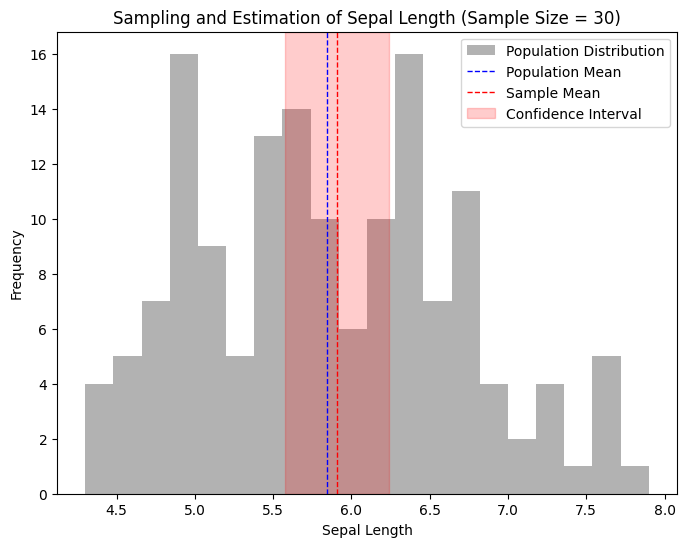

In [9]:
# 1. Load a dataset from UCIMLrepo (e.g., Iris dataset)
iris_dataset = ucimlrepo.fetch_ucirepo(id=53)
iris_data = iris_dataset.data.features  # Features (measurements)
iris_target = iris_dataset.data.targets  # Target (species)
iris_df = pd.DataFrame(iris_data, columns=iris_dataset.feature_names)
print(iris_df.columns.to_list())

# 2. Define the population (in this case, the entire dataset)
population_data = iris_df['sepal length']  # Example: using 'sepal_length' as the population

# 6. Example usage
population_data = population_data.to_numpy() #convert the pandas series to numpy array
sample_size = 30
confidence_level = 0.95

sample_mean, confidence_interval = sample_and_estimate(population_data, sample_size, confidence_level)

if sample_mean is not None and confidence_interval != (None, None):
    print(f"Sample Mean: {sample_mean:.2f}")
    print(f"{confidence_level * 100}% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

    # 7. Visualization (optional)
    plt.figure(figsize=(8, 6))
    plt.hist(population_data, bins=20, alpha=0.6, color='gray', label='Population Distribution')
    plt.axvline(population_data.mean(), color='blue', linestyle='dashed', linewidth=1, label='Population Mean')  #population mean
    plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=1, label='Sample Mean')
    plt.axvspan(confidence_interval[0], confidence_interval[1], color='red', alpha=0.2, label='Confidence Interval')
    plt.title(f'Sampling and Estimation of Sepal Length (Sample Size = {sample_size})')
    plt.xlabel('Sepal Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()